In [5]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/input/ml-100k/'

In [6]:
train = pd.read_csv(path + 'ua.base', sep='\t',
                    names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv(path + 'ua.test', sep='\t',
                    names=['user', 'movie', 'rating', 'timestamp'])

train.head()

,user,movie,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


# 토치 텐서로 변환

In [7]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

# 모델 구조화 및 시각화

epoch: 0, cost: 24.232168
epoch: 100, cost: 0.564943
epoch: 200, cost: 0.491056
epoch: 300, cost: 0.468176
epoch: 400, cost: 0.458510
epoch: 500, cost: 0.453135
epoch: 600, cost: 0.449287
epoch: 700, cost: 0.446328
epoch: 800, cost: 0.444256
epoch: 900, cost: 0.442853


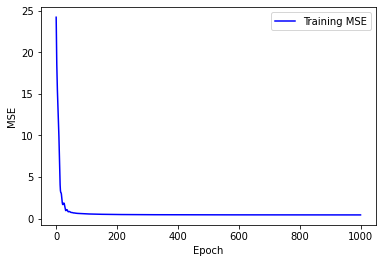

In [10]:
# rank → 사용자, 아이템 vector의 차원
# numUsers → 사용자 수
# numItems → 아이템 수
# P → 아이템 매트릭스
# Q → 사용자매트릭스

#차원수는 직접 조절 가능함!
rank = 10

#0부터 시작하기때문에 1 더해주기 
numItems = items.max() + 1
numUsers = users.max() + 1

#처음에 랜덤 숫자로 채워주기 
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X, Y = [], []

for epoch in range(1000):

    # 가설 = 예상별점(아이템벡터와 유저벡터 내적)
    hypothesis = torch.sum(P[items] * Q[users], dim=1)
    # 비용 = MSE
    cost = F.mse_loss(hypothesis, ratings)
    # 기울기 계산
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    X.append(epoch)
    Y.append(cost)

    if epoch % 100 == 0:
        print('epoch: {}, cost: {:.6f}'.format(epoch, cost.item()))

plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.plot(X, Y, c='blue', label='Training MSE')
plt.legend()
plt.show()